#     Initial Data Inspection 
###    05/05/17 
Look at the data for the most massive BHs to get an idea of what variables we have and how to use them.

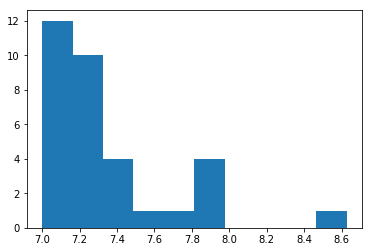

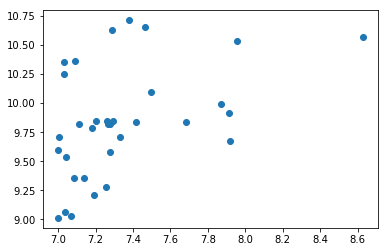

In [10]:
import numpy as np
import matplotlib.pyplot as plt

#Load data
fname='/Users/Maddie/Downloads/massive_bh/Tiamat/BlackHoleMass_z5pt84.dat'
BHmass=np.fromfile(fname,dtype=float,count=-1,sep="")
fname='/Users/Maddie/Downloads/massive_bh/Tiamat/StellarMass_z5pt84.dat'
stellarmass=np.fromfile(fname,dtype=float,count=-1,sep="")


#Plot histogram of the log of the BH masses
logmass=np.log10(BHmass*1E10)
plt.hist(logmass)
plt.show()

plt.plot(logmass,np.log10(stellarmass*1E10),'o')
plt.show()

Host has disk radius = 0.2872 kpc and stellar mass = 3.6919e10 Msun
ID90016870715


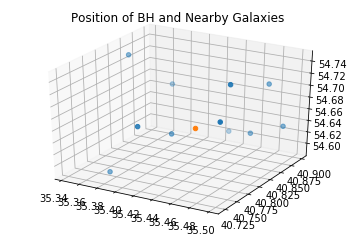

Properties: ['BHmass', 'ID', 'Type', 'CentralGal', 'ColdGas', 'HotGas', 'StellarMass', 'DiskScaleLength', 'Sfr', 'Rvir', 'Mvir', 'Vvir', 'XPos', 'YPos', 'ZPos']
Properties: [  2.54803831e-06   1.30014166e+11   0.00000000e+00   5.48600000e+03
   4.78012953e-04   5.09816933e+01   6.55831350e-03   1.05194247e-03
   0.00000000e+00   7.24253133e-02   3.60107086e+02   4.62424286e+02
   5.46419792e+01   4.07952499e+01   3.54174500e+01]
Closest galaxy is at distance 26.4572 kpc (Comoving) or 3.8628 kpc (Proper)
Closest galaxy has disk radius = 3.1558 kpc and stellar mass = 0.0066e10 Msun


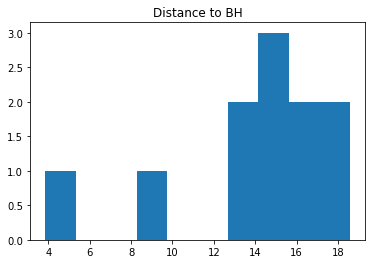

Median galaxy disk radius is 0.2056 kpc.
Median galaxy stellar mass is 0.0006e10 Msun.


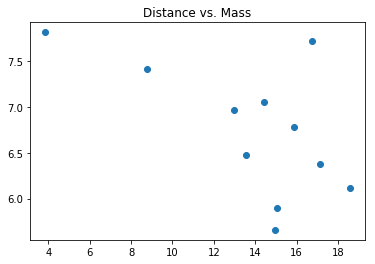

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

##Load and store the data for the most massive BH in the data files
#Load data
fname='/Users/Maddie/Downloads/massive_bh/Tiamat/BlackHoleMass_z5pt84.dat'
BHmass=np.fromfile(fname,dtype=float,count=-1,sep="")
#Find location of most massive BH in the data files
maxBHloc=np.argmax(BHmass)
#Import the properties of this BH/host into a 1D array called BHproperties
addcolumns=['ID','Type','CentralGal','ColdGas','HotGas','StellarMass','DiskScaleLength','Sfr','Rvir','Mvir','Vvir']
BHproperties=[BHmass[maxBHloc]]
for name in addcolumns: 
    fname='/Users/Maddie/Downloads/massive_bh/Tiamat/'+name+'_z5pt84.dat'
    col=np.fromfile(fname,dtype=float,count=maxBHloc+1,sep="")
    BHproperties.append(col[maxBHloc])
fname='/Users/Maddie/Downloads/massive_bh/Tiamat/Pos_z5pt84.dat'
col=np.fromfile(fname,dtype=float,count=-1,sep="")
BHproperties.append(col[3*maxBHloc])
BHproperties.append(col[3*maxBHloc+1])
BHproperties.append(col[3*maxBHloc+2])
BHproperties=np.array(BHproperties)
columns=['BHmass','ID','Type','CentralGal','ColdGas','HotGas','StellarMass','DiskScaleLength','Sfr','Rvir','Mvir','Vvir','XPos','YPos','ZPos']
print('Host has disk radius = '+str(round(3*BHproperties[7]*1000,4))+' kpc and stellar mass = '+str(round(BHproperties[6],4))+'e10 Msun')

##Load the data of the nearby galaxies into a 2D array called companionProperties
#Find number of nearby galaxies
print('ID'+str(int(BHproperties[1])))
fname='/Users/Maddie/Downloads/environment/Tiamat/'+str(int(BHproperties[1]))+'/ID.dat'
data=np.fromfile(fname,dtype=float,count=-1,sep="")
numNearby=len(data)
#Load in each property one at a time
companionProperties=np.zeros([numNearby,15])
fname='/Users/Maddie/Downloads/environment/Tiamat/'+str(int(BHproperties[1]))+'/'+'BlackHoleMass.dat'
companionProperties[:,0]=(np.fromfile(fname,dtype=float,count=-1,sep=""))
i=1
for name in addcolumns: 
    fname='/Users/Maddie/Downloads/environment/Tiamat/'+str(int(BHproperties[1]))+'/'+name+'.dat'
    companionProperties[:,i]=(np.fromfile(fname,dtype=float,count=-1,sep=""))
    i=i+1

fname='/Users/Maddie/Downloads/environment/Tiamat/'+str(int(BHproperties[1]))+'/Pos.dat'
pos=np.fromfile(fname,dtype=float,count=-1,sep="")
xpos=[]
ypos=[]
zpos=[]
for i in range(0,numNearby):
    xpos.append(pos[3*i])
    ypos.append(pos[3*i+1])
    zpos.append(pos[3*i+2])
xpos=np.array(xpos)
ypos=np.array(ypos)
zpos=np.array(zpos)
companionProperties[:,-3]=xpos
companionProperties[:,-2]=ypos
companionProperties[:,-1]=zpos

##Plot positions of the galaxies & BH in 3D
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(companionProperties[:,-1],companionProperties[:,-2],companionProperties[:,-3])
ax.scatter(BHproperties[-1],BHproperties[-2],BHproperties[-3])
plt.title('Position of BH and Nearby Galaxies')
plt.show()

distanceToBH=np.sqrt(np.square(companionProperties[:,-3]-BHproperties[-3])+
    np.square(companionProperties[:,-2]-BHproperties[-2])+
    np.square(companionProperties[:,-1]-BHproperties[-1]))
minloc=np.argmin(distanceToBH)

print('Properties:',columns)
print('Properties:',companionProperties[minloc,:])
#print('BHProperties:',BHproperties)


print('Closest galaxy is at distance '+str(round(distanceToBH[minloc]*1000,4))+' kpc (Comoving) or '
+str(round(distanceToBH[minloc]*1000*0.146,4))+' kpc (Proper)')
print('Closest galaxy has disk radius = '+str(np.round(3*companionProperties[minloc,7]*1000,4))+
      ' kpc and stellar mass = '+str(np.round(companionProperties[minloc,6],4))+'e10 Msun')

##Plot disk radius distribution
#plt.hist(np.log10(3*companionProperties[:,7]*1000))
#plt.hist(np.log10(3*BHproperties[7]*1000))
#plt.hist(np.log10(3*companionProperties[minloc,7]*1000))
#plt.title('log(Galaxy Disk Radius (kpc))')
#plt.show()
##Plot stellar mass distribution
#plt.hist(np.log10(companionProperties[:,6]))
#plt.hist(np.log10(BHproperties[6]))
#plt.hist(np.log10(companionProperties[minloc,6]))
#plt.title('log(Galaxy Stellar Mass (1E10 Msun))')
#plt.show()
##Plot BH mass distribution
#plt.hist(np.log10(companionProperties[:,0]))
#plt.hist(np.log10(BHproperties[0]))
#plt.hist(np.log10(companionProperties[minloc,0]))
#plt.title('log(Galaxy BH Mass (1E10 Msun))')
#plt.show()
##Plot cold mass distribution
#plt.hist(np.log10(companionProperties[:,4]))
#plt.hist(np.log10(BHproperties[4]))
#plt.hist(np.log10(companionProperties[minloc,4]))
#plt.title('log(Galaxy Cold Mass (1E10 Msun))')
#plt.show()
##Plot halo mass distribution
#plt.hist(np.log10(companionProperties[:,10]))
#plt.hist(np.log10(BHproperties[10]))
#plt.hist(np.log10(companionProperties[minloc,10]))
#plt.title('log(Halo Mass (1E10 Msun))')
#plt.show()
##Plot Galaxy Type distribution
#plt.hist(companionProperties[:,2])
#plt.hist(BHproperties[2])
#plt.hist(companionProperties[minloc,2])
#plt.title('Galaxy Type')
#plt.show()

plt.hist(distanceToBH*0.146*1000)
plt.title('Distance to BH')
plt.show()

#print('Properties:',columns[0],columns[4:11])
#print(np.median(companionProperties[:,0]),np.median(companionProperties[:,4:11],axis=0))

print('Median galaxy disk radius is '+str(np.round(np.median(3*companionProperties[:,7]*1000),4))+' kpc.')
print('Median galaxy stellar mass is '+str(np.round(np.median(companionProperties[:,6]),4))+'e10 Msun.')

plt.plot(distanceToBH*0.146*1000,np.log10(companionProperties[:,6]*1e10),'o')
plt.title('Distance vs. Mass')
plt.show()

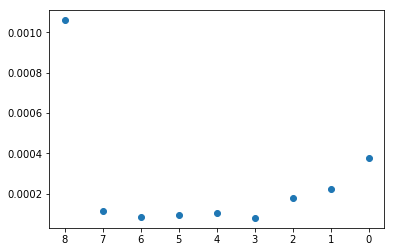

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

##Load and store the data for the most massive BH in the data files
addcolumns=['ID','Type','CentralGal','ColdGas','HotGas','StellarMass','DiskScaleLength','Sfr','Rvir','Mvir','Vvir']
columns=['BHmass','ID','Type','CentralGal','ColdGas','HotGas','StellarMass','DiskScaleLength','Sfr','Rvir','Mvir','Vvir','XPos','YPos','ZPos']

BHproperties_all=np.zeros((15,9))
i=0
for redshift in ['5pt59','5pt64','5pt69','5pt74','5pt79','5pt84','5pt90','5pt95','6pt01']:
    #Load data
    fname='/Users/Maddie/GoogleDrive/PhD/Simulations/massive_bh/Tiamat/BlackHoleMass_z'+redshift+'.dat'
    BHmass=np.fromfile(fname,dtype=float,count=-1,sep="")
    #Find location of most massive BH in the data files
    maxBHloc=np.argmax(BHmass)
    #Import the properties of this BH/host into a 1D array called BHproperties
    BHproperties=[BHmass[maxBHloc]]
    for name in addcolumns: 
        fname='/Users/Maddie/GoogleDrive/PhD/Simulations/massive_bh/Tiamat/'+name+'_z'+redshift+'.dat'
        col=np.fromfile(fname,dtype=float,count=maxBHloc+1,sep="")
        BHproperties.append(col[maxBHloc])
    fname='/Users/Maddie/GoogleDrive/PhD/Simulations/massive_bh/Tiamat/Pos_z'+redshift+'.dat'
    col=np.fromfile(fname,dtype=float,count=-1,sep="")
    BHproperties.append(col[3*maxBHloc])
    BHproperties.append(col[3*maxBHloc+1])
    BHproperties.append(col[3*maxBHloc+2])
    BHproperties=np.array(BHproperties)
    BHproperties_all[:,i]=BHproperties
    i=i+1
plt.plot(BHproperties_all[7,:],'o')
plt.gca().invert_xaxis()
plt.show()
